# **Hipótesis 3**:

### **"En un núcleo familiar compuesto por más miembros es más probable que se invierta en energía renovable"**

- Cuando un núcleo familiar se compone de más miembros, el consumo energético que producen es más elevado. Por lo tanto, invertir en dispositivos de energía renovable es una vía de ahorro en cuanto al precio pagado en las facturas.

- Por otro lado, no tener que depender de la red eléctrica ni de compañías energéticas, disminuye el riesgo de apagones y la incertidumbre en cuanto a gastos. 

- Todo esto hechos, unido a que por el Plan de Recuperación, Transformación y Resiliencia del Gobierno de España que ofrece incentivos por la instalación de tecnologías renovables, pueden ser suficientes factores para sustentar que un núcleo familiar más grande pueda optar con más facilidad a dispositivos de energía renovable. No obstante, se tratará de validar esta hipótesis a continuación.

### **Preparación del entorno**

In [334]:
import pandas as pd
import numpy
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm  
import numpy as np
from sklearn import preprocessing 
import os 
from scipy import stats
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import DistanceMetric
import plotly.express as px


GOLD_DATA_PATH = os.path.join("..", "..", "data/gold/")

- Se lee el csv que contiene el dataset que se utilizará para tratar de validar la hipótesis.

In [335]:
h3_df = pd.read_csv(GOLD_DATA_PATH + "data_card_3_df.csv", sep = ";", encoding = "latin", index_col= 'Provincias')
h3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Albacete to Ávila
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Índice dispositivos energía renovable   47 non-null     float64
 1   Familia monoparental con 0 hijos        47 non-null     float64
 2   Familia monoparental con 1 hijo         47 non-null     float64
 3   Familia monoparental con 2 hijos o más  47 non-null     float64
 4   Pareja casada con 0 hijos               47 non-null     float64
 5   Pareja casada con 1 hijo                47 non-null     float64
 6   Pareja casada con 2 hijos o más         47 non-null     float64
 7   Pareja no casada con 0 hijos            47 non-null     float64
 8   Pareja no casada con 1 hijo             47 non-null     float64
 9   Pareja no casada con 2 hijos o más      47 non-null     float64
dtypes: float64(10)
memory usage: 4.0+ KB


### **Explanatory Data Analysis**

In [336]:
# Visualizar datos
h3_df.head()

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más
Provincias,,,,,,,,,,
Albacete,0.043141,0.033132,0.072565,0.044648,0.304961,0.176333,0.256043,0.051729,0.028501,0.032087
Alicante/Alacant,0.040361,0.041038,0.094143,0.045081,0.329020,0.160075,0.207443,0.065322,0.037659,0.020219
Almería,0.067138,0.030276,0.090071,0.042470,0.290029,0.161023,0.254404,0.059751,0.040286,0.031691
Araba/Álava,0.104454,0.033775,0.097398,0.045232,0.328722,0.157060,0.201585,0.072500,0.037726,0.026002
Asturias,0.050314,0.056932,0.115216,0.035539,0.365556,0.187972,0.132908,0.066571,0.023420,0.015886


- **Correlación entre variables**

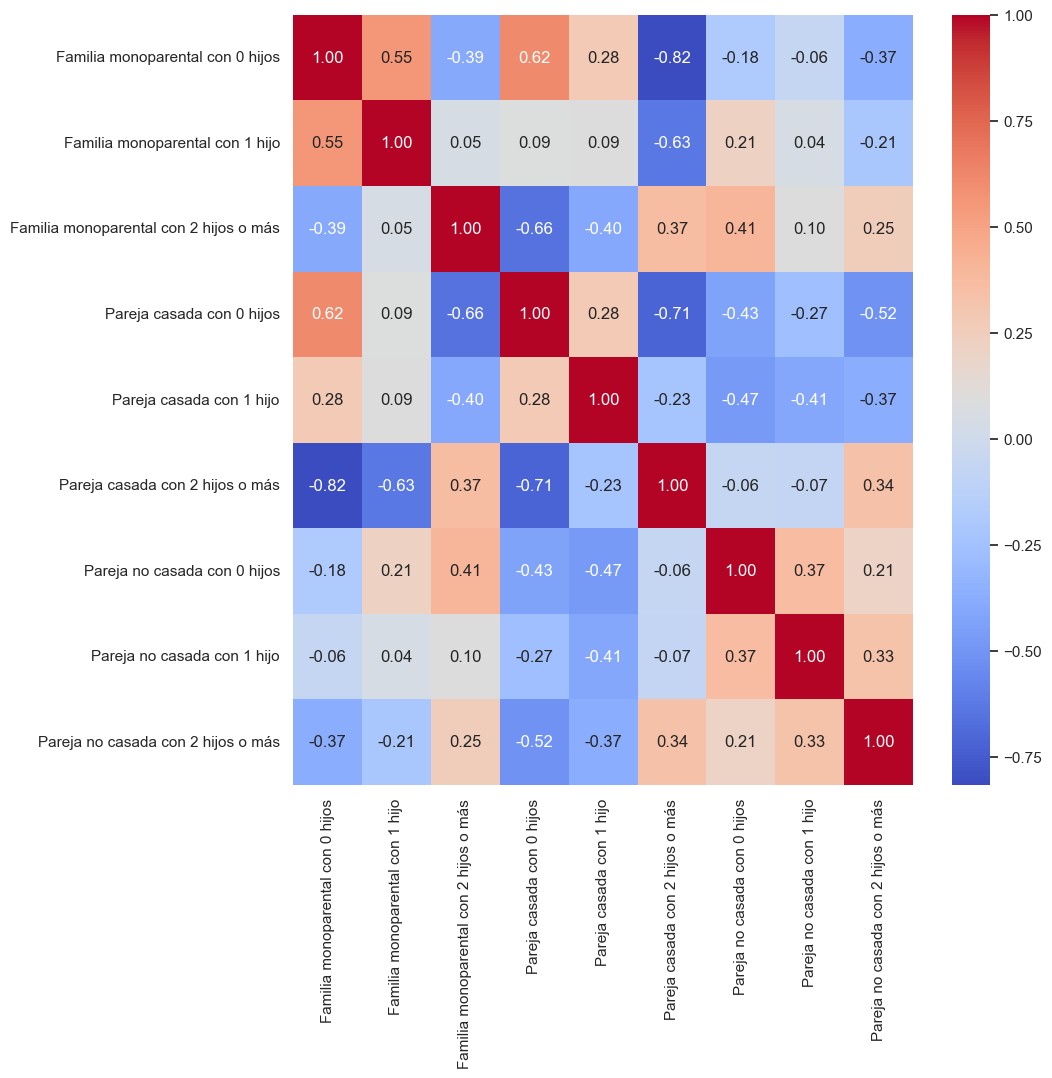

In [337]:
# Correlation matrix
corr = h3_df.iloc[:, 1:].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

- Respecto a las correlaciones entre *Índice de dispositivos de energía renovable* y las variables de tipo de núcleo familiar, aunque no son muy fuertes, hay algunas a destacar.

    - Por un lado,hay correlación negativa con *Familia monoparental con 0 hijos* y con *Pareja casada con 0 hijos*. Aunque sean débiles (-0.39 y -0.48 respectivamente), da a entender que en una provincia habrá más dispositivos de energía renovable cuando haya menos núcleos familiares pequeños.

    - Por otro lado, hay correlación positiva con *Familia monoparental con 2 hijos o más*, *Pareja casada con 2 hijos o más* y con *Pareja no casada con 2 hijos o más*. De la misma manera, aunque sean correlaciones débiles, se entiende que al haber núcleos familiares de más componentes en una provincia, el índice de dispositivos de energía renovable es mayor.

- **Pairplot para visualizar la distribución de valores en variables.**

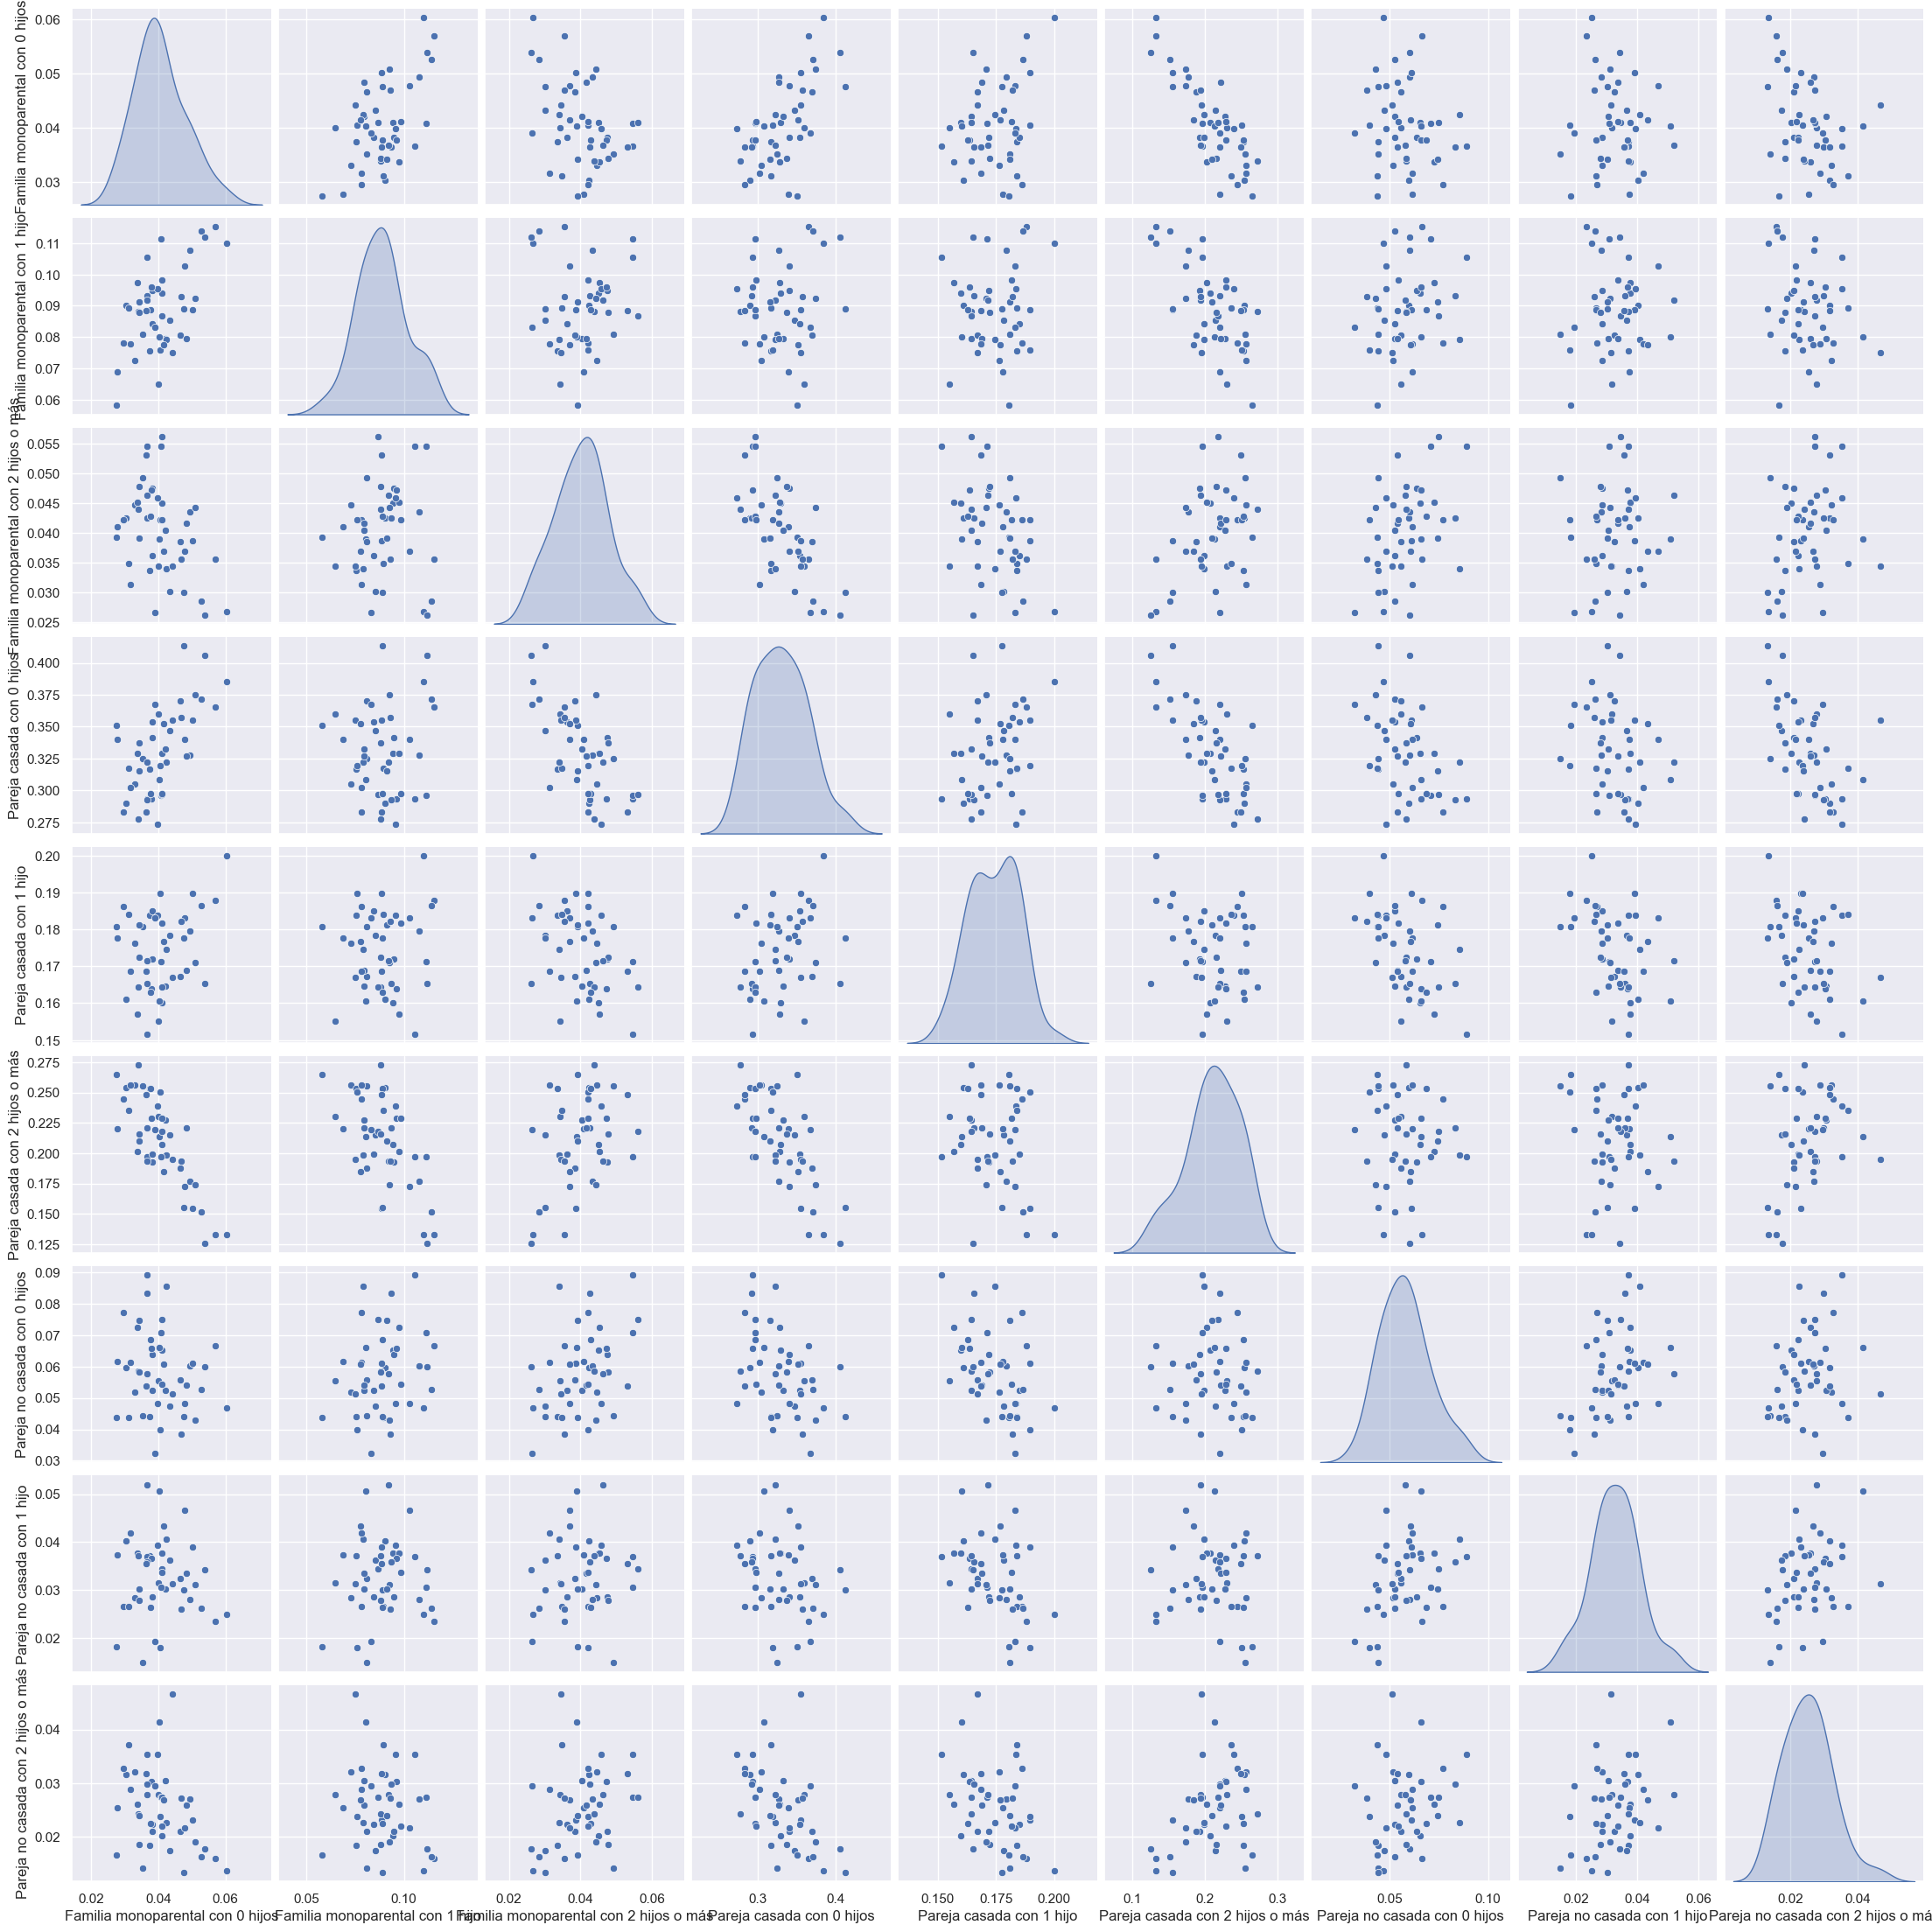

In [338]:
sns.pairplot(h3_df.iloc[:, 1:], diag_kind='kde')

- En el pairplot, se visualizan claramente las correlaciones entre las variables. 

    - Por ejemplo, *Familia monoparental con 0 hijos* y *Pareja casada con 2 hijo o más* tienen una fuerte correlación negativa (-0.82) lo que sugiere que si una provincia tiene una alta proporción de familias monoparentales con 0 hijos, tiene una proporción baja de parejas casadas con 2 hijos o más.

- Además, respecto a la distribución de variables, parece que la mayoría de variables siguen una distribución normal, no obstante, en algunos casos parece desviada (skewed). Por lo tanto, se visualizarán los QQ plots para asegurar.

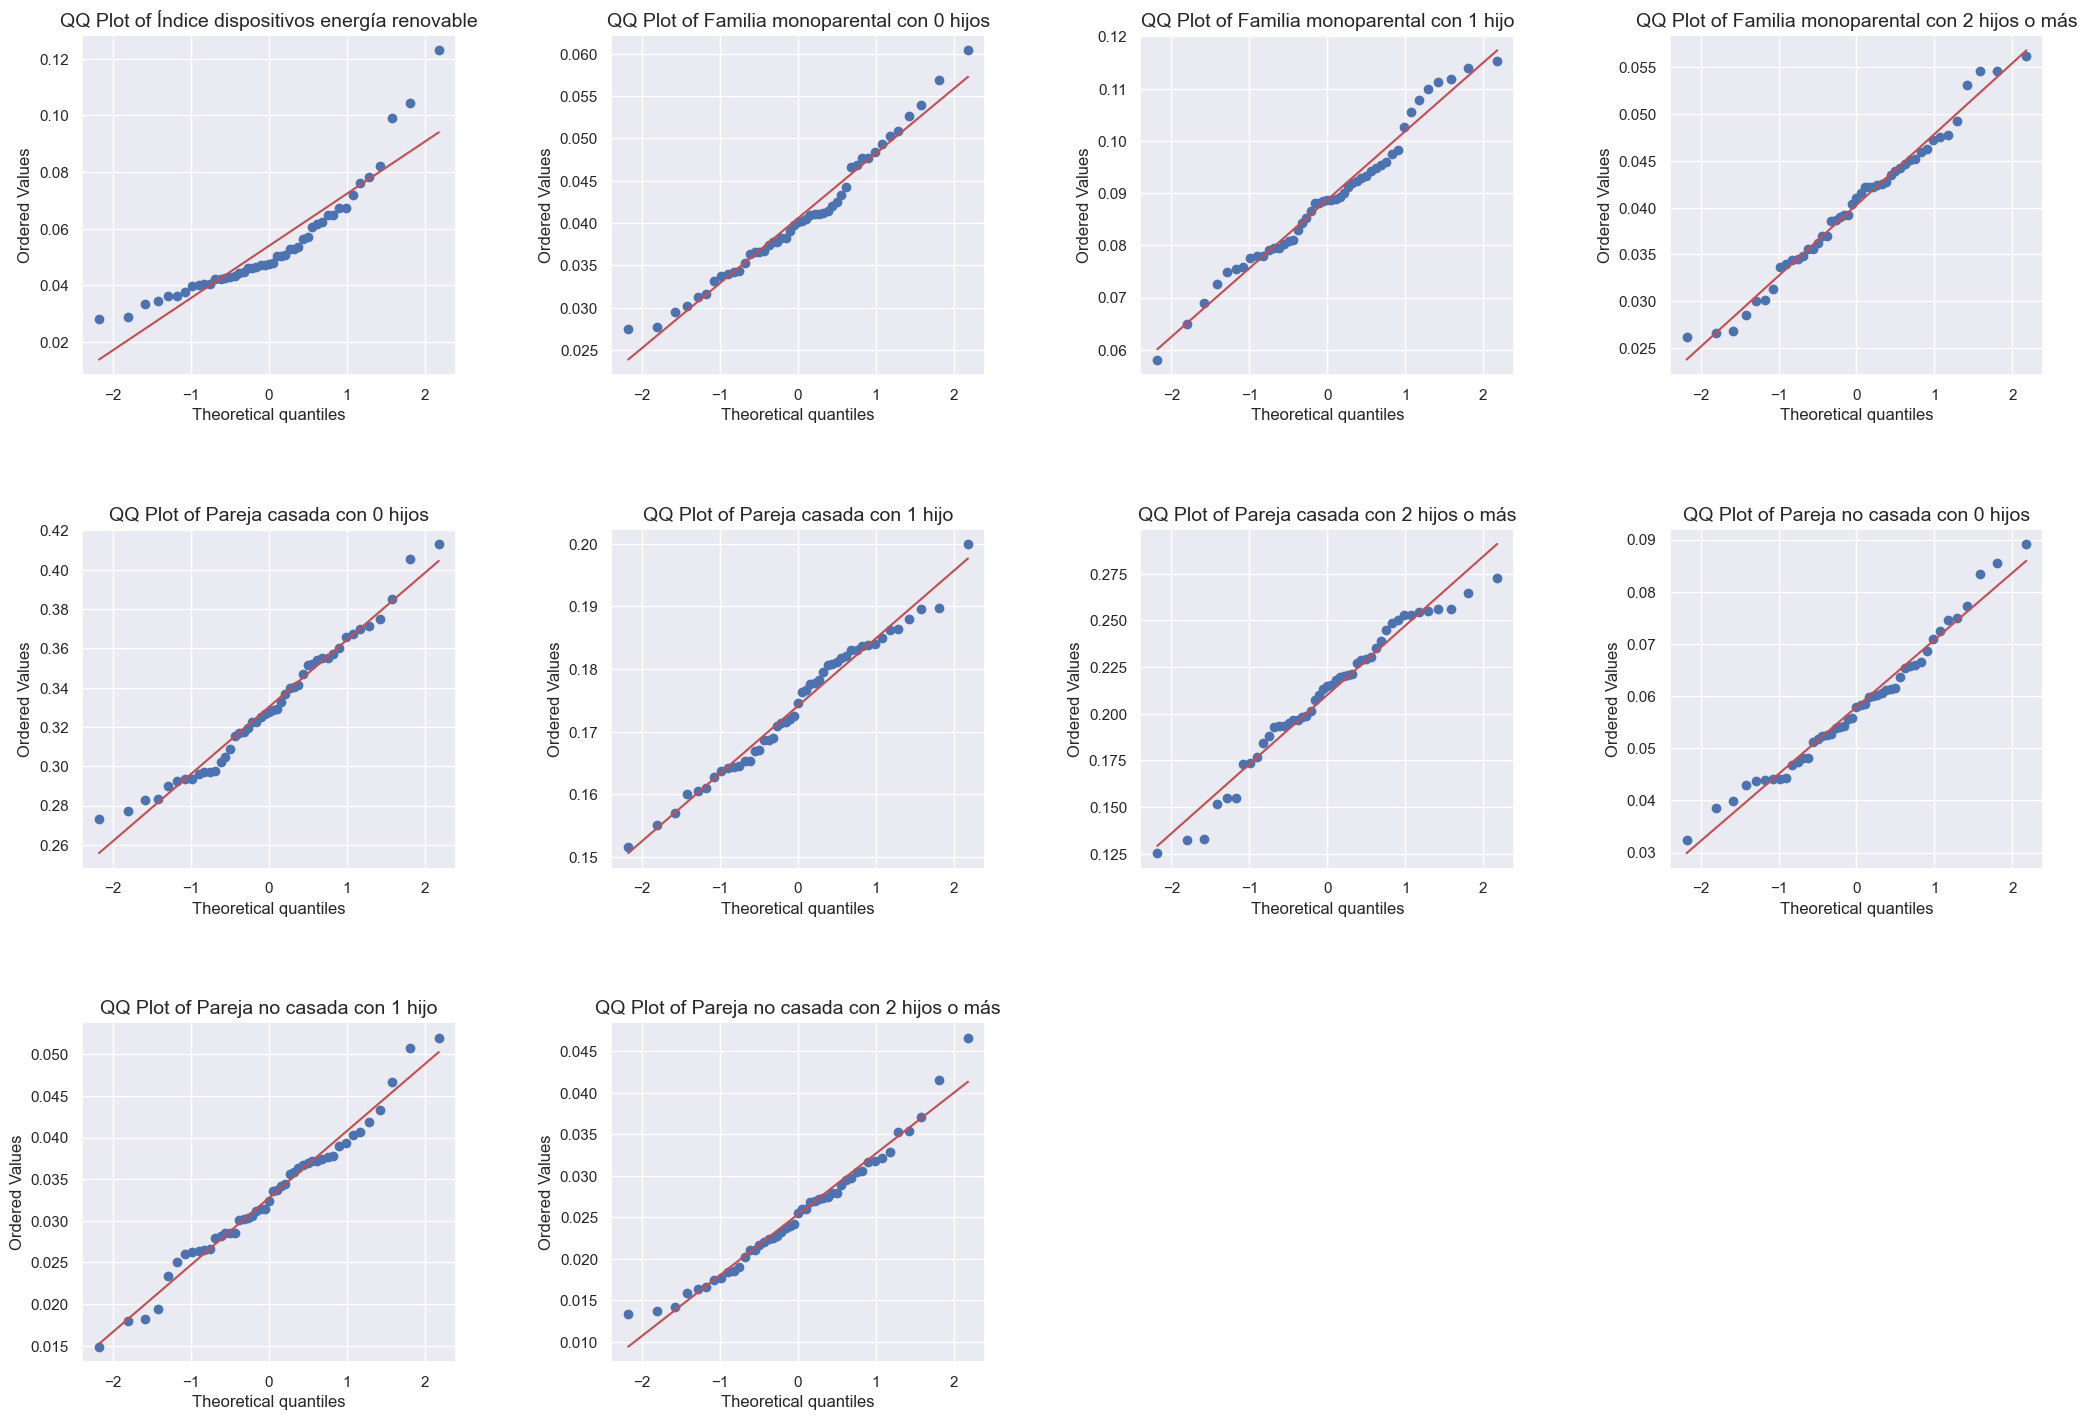

In [339]:
# Filtramos solo las columnas numéricas, excluyendo la columna 'Provincias'
numeric_columns = h3_df.select_dtypes(include=['number'])

plt.figure(figsize=(22, 30))  # Tamaño de la figura para mostrar todos los gráficos

# Bucle para crear los QQ plots para cada columna numérica
for i, column in enumerate(numeric_columns.columns, start=1):  # Usamos enumerate para el índice
    plt.subplot(6, 4, i)  # Ajustamos el tamaño de la cuadrícula para los gráficos
    stats.probplot(numeric_columns[column], dist="norm", plot=plt)
    plt.title(f"QQ Plot of {column}", fontsize=14)

# Ajuste de la disposición para evitar solapamientos
plt.tight_layout(pad=5)

# Mostrar la gráfica
plt.show()

### **Normalización de datos**

- Para continuar con la validación de la hipótesis, se va a aplicar un modelo de K-Means a nuestro dataset. De esta manera, se intentará agrupar las provincias por características similares y así, poder hacer una mayor distinción y llegar a una conclusión final para la hipótesis tras analizar los resultados.

- Se hace una selección de todas las columnas excepto la primera, que corresponpde a las provincias.

In [340]:
# Selección de características para el clustering
features = h3_df.iloc[:, 1:]  # Todas las columnas excepto 'Provincias'

- Anteriormente, se ha concluido que las variables no siguen en su mayoría una distribución normal, por lo que, antes de hacer el modelo k-means, se normalizan las variables con MinMaxScaler, en vez de con StandardScaler (pues supone una distribución normal).

In [341]:
# Se normalizan los datos con MinMaxScaler
scaler = MinMaxScaler()
# Se ajusta y transforma el conjunto de datos
features_scaled = scaler.fit_transform(features)

### **Análisis de componentes principales**
- Como el dataset tiene bastantes columnas, se va a aplicar PCA para preprocesar los datos antes del clustering.

In [342]:
pca = PCA(n_components=2) # 2 componentes principales
X_pca = pca.fit_transform(features_scaled)

In [343]:
print(pca.explained_variance_ratio_) 

[0.42341116 0.21617551]


In [344]:
pd.DataFrame(numpy.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index= features.columns)

,PC-1,PC-2
Familia monoparental con 0 hijos,0.423180,0.246570
Familia monoparental con 1 hijo,0.209019,0.493218
Familia monoparental con 2 hijos o más,-0.374348,0.264439
Pareja casada con 0 hijos,0.469605,-0.102677
Pareja casada con 1 hijo,0.260800,-0.288730
Pareja casada con 2 hijos o más,-0.454667,-0.403773
Pareja no casada con 0 hijos,-0.201913,0.492921
Pareja no casada con 1 hijo,-0.130550,0.345412
Pareja no casada con 2 hijos o más,-0.289850,0.082410


- A continuación, se visualizan las relaciones entre provincias por sus datos preprocesados en espacio bidimensional (por el PCA).

Text(0.5, 1.0, 'Representación 2D de los datos (por provincias)')

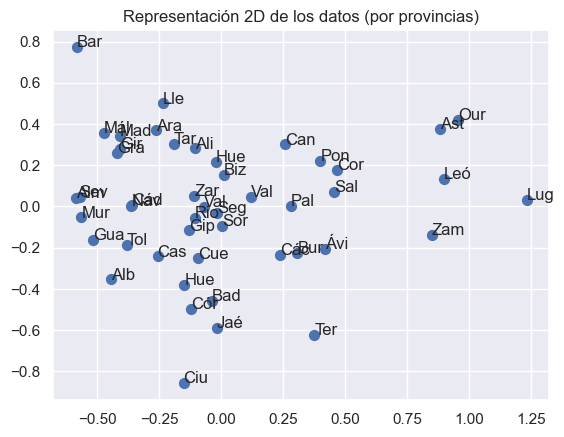

In [345]:
fig, ax = plt.subplots()
# Provincias
h3_df_provinces = h3_df.index
ax.scatter(X_pca[:,0], X_pca[:,1] ,s=50)

# anotación 
for i in range(0,len(X_pca)):
    # annotate with name of province
    ax.annotate(h3_df_provinces[i][0:3], (X_pca[i,0], X_pca[i,1]))
ax.set_title('Representación 2D de los datos (por provincias)')

### **Clustering Jerárquico**

- Se calcula la matriz de similud entre las diferentes provincias mediante la distancia euclídea. Se utiliza un gráfico de calor.

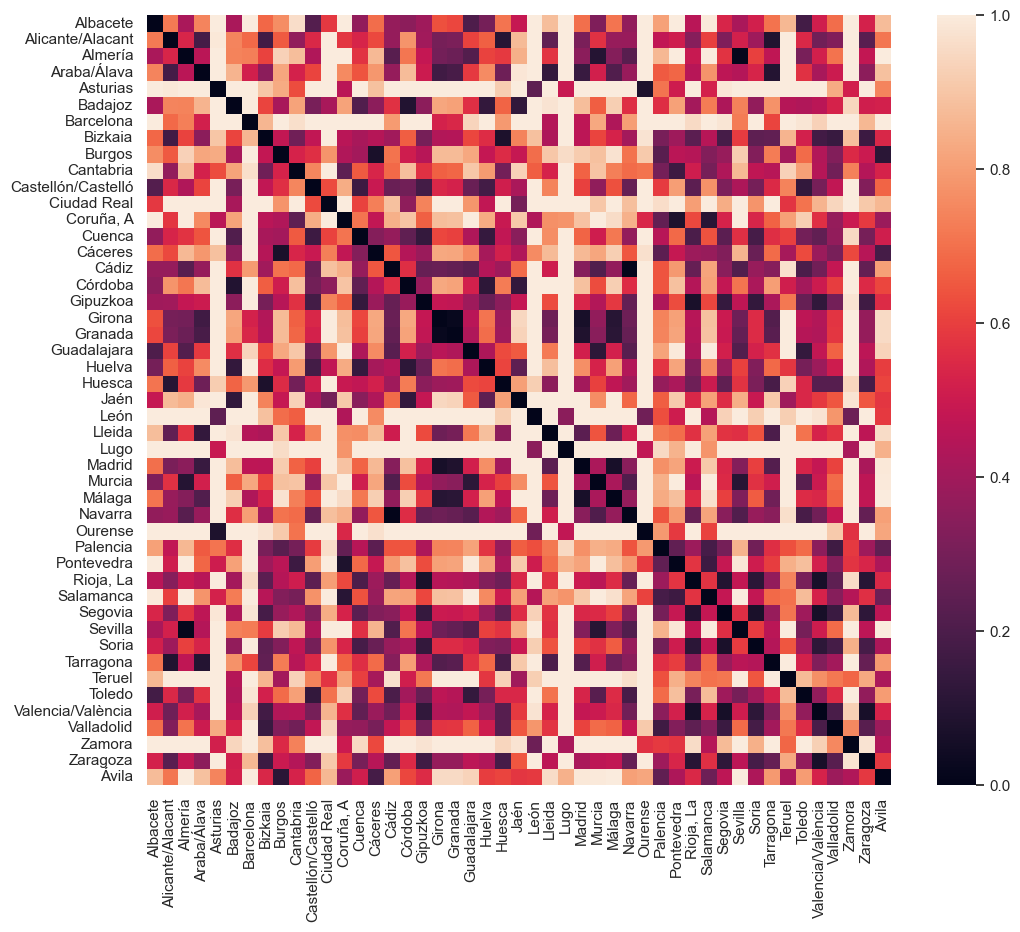

In [346]:
# 3. Hierarchical Clustering
# 3.1. Compute the similarity matrix
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
# Calcular la matriz de distancias euclidianas
matsim = euclidean_distances(X_pca)

# 3.1.1 Visualization
plt.figure(figsize=(12,10))
sns.set()

# Crear un mapa de calor para visualizar la matriz de distancias
ax = sns.heatmap(matsim, vmin=0, vmax=1, xticklabels=h3_df.index, yticklabels=h3_df.index)


- Se ha probado con diferentes métodos de enlace (single, complete, etc.) pero el que formaba un mejor clustering (visualizado en dendograma) era el método ward. El método ward une los clusters que produzcan el menor incremento de la suma de los cuadrados de las diferencias, dentro de cluster, de cada individuo al centroide.

C:\Users\SergioHF\AppData\Local\Temp\ipykernel_4220\806981457.py:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matsim, method = 'ward')


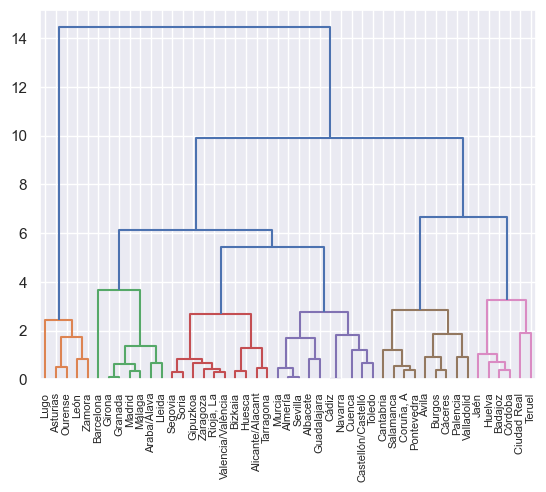

<Figure size 640x480 with 0 Axes>

In [347]:
# 3.2. Building the Dendrogram	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'ward')

cluster.hierarchy.dendrogram(clusters, color_threshold= 5, labels = h3_df.index)

# 3.2.1 Visualization
plt.figure()
plt.show()


- Otra forma de representar el dendograma es usando clustermap, que también calcula los clusters por filas y columnas.

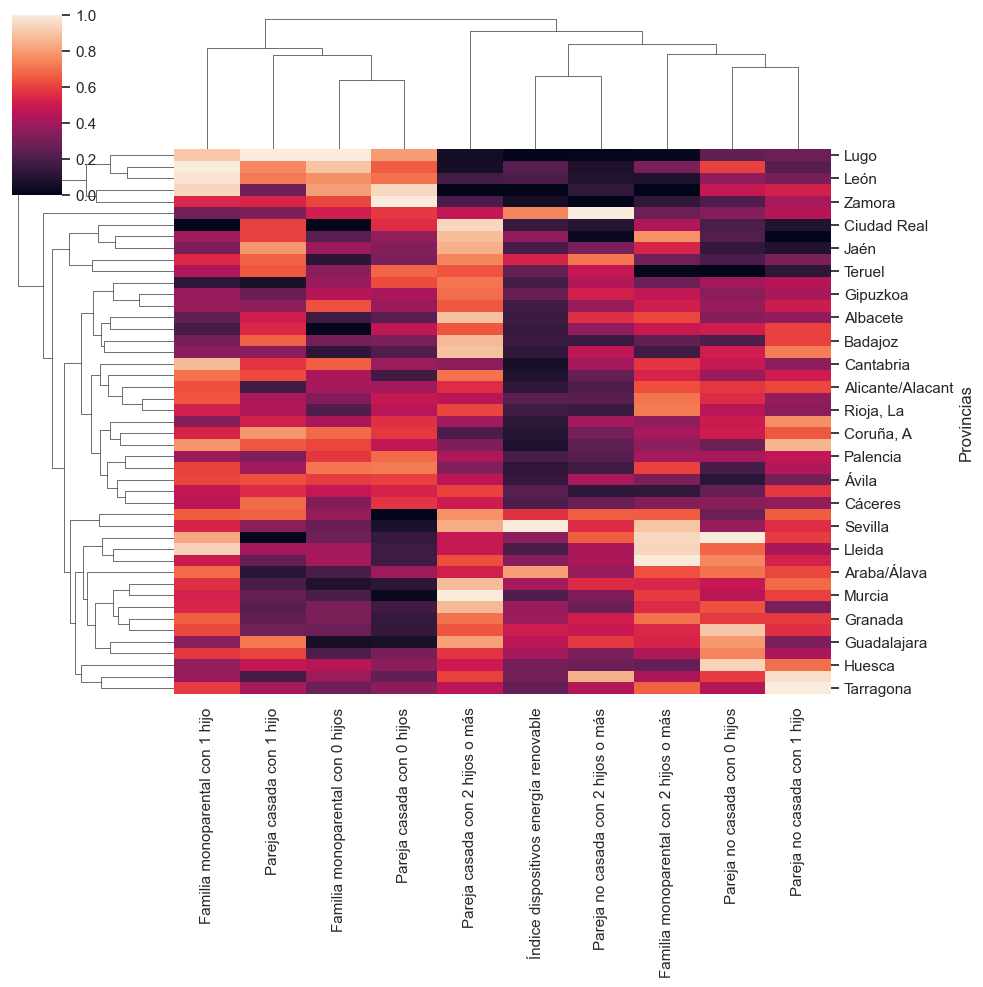

In [348]:
sns.set(color_codes=True)
sns.clustermap(h3_df, standard_scale=1)

- Se ha decidido un corte a nivel 11 para tener dos grupos.

In [349]:
cut = 11
labels = cluster.hierarchy.fcluster(clusters, cut, criterion = 'distance')
labels

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2], dtype=int32)

In [350]:
from sklearn import metrics
n_clusters_ =len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(features_scaled, labels))

Estimated number of clusters: 2
Silhouette Coefficient: 0.341


- El coeficiente de silueta obtenido (0,341) es **débil**. No obstante, se comprabará cada cluster para tratar de concluir si el clustering agrupa las provincias de manera que se pueda llegar a validar nuestra hipótesis.

- Plot con los dos clusters diferenciados.

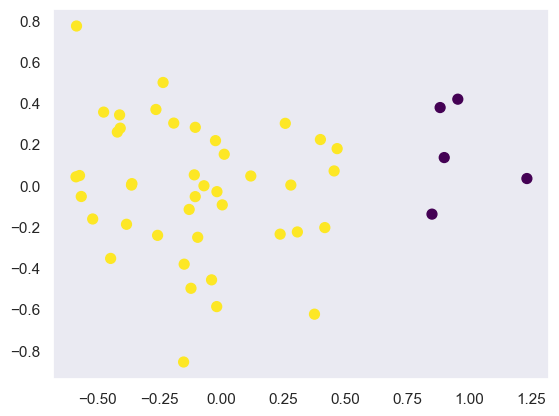

In [351]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50, cmap='viridis')
plt.grid()
plt.show()

- Posteriormente, se tratará de interpretar los clusters. ¿Por qué hay un cluster con pocas provincias?

- Se etiqueta cada provincia con el cluster al que pertenece.

In [352]:
h3_df['Cluster'] = labels
h3_df.head()

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster
Provincias,,,,,,,,,,,
Albacete,0.043141,0.033132,0.072565,0.044648,0.304961,0.176333,0.256043,0.051729,0.028501,0.032087,2
Alicante/Alacant,0.040361,0.041038,0.094143,0.045081,0.329020,0.160075,0.207443,0.065322,0.037659,0.020219,2
Almería,0.067138,0.030276,0.090071,0.042470,0.290029,0.161023,0.254404,0.059751,0.040286,0.031691,2
Araba/Álava,0.104454,0.033775,0.097398,0.045232,0.328722,0.157060,0.201585,0.072500,0.037726,0.026002,2
Asturias,0.050314,0.056932,0.115216,0.035539,0.365556,0.187972,0.132908,0.066571,0.023420,0.015886,1


- Mostramos las provincias por cluster

In [353]:
# Visualizar los clusters obtenidos
for cluster_id in range(1,3,1):
    print(f"Provincias en el Cluster {cluster_id}:")
    print(h3_df[h3_df["Cluster"] == cluster_id].index.values)
    print()

Provincias en el Cluster 1:
['Asturias' 'León' 'Lugo' 'Ourense' 'Zamora']

Provincias en el Cluster 2:
['Albacete' 'Alicante/Alacant' 'Almería' 'Araba/Álava' 'Badajoz'
 'Barcelona' 'Bizkaia' 'Burgos' 'Cantabria' 'Castellón/Castelló'
 'Ciudad Real' 'Coruña, A' 'Cuenca' 'Cáceres' 'Cádiz' 'Córdoba' 'Gipuzkoa'
 'Girona' 'Granada' 'Guadalajara' 'Huelva' 'Huesca' 'Jaén' 'Lleida'
 'Madrid' 'Murcia' 'Málaga' 'Navarra' 'Palencia' 'Pontevedra' 'Rioja, La'
 'Salamanca' 'Segovia' 'Sevilla' 'Soria' 'Tarragona' 'Teruel' 'Toledo'
 'Valencia/València' 'Valladolid' 'Zaragoza' 'Ávila']



#### **Análisis de clusters obtenidos**

In [354]:
h3_df.columns

Index(['Índice dispositivos energía renovable',
       'Familia monoparental con 0 hijos', 'Familia monoparental con 1 hijo',
       'Familia monoparental con 2 hijos o más', 'Pareja casada con 0 hijos',
       'Pareja casada con 1 hijo', 'Pareja casada con 2 hijos o más',
       'Pareja no casada con 0 hijos', 'Pareja no casada con 1 hijo',
       'Pareja no casada con 2 hijos o más', 'Cluster'],
      dtype='object')

- Se van a seleccionar features específicas para tratar de visualizar por barplots las diferencias entre los clusters formados.
    - Por un lado se coje el índice de dispositivos de energía renovable.
    - Por otro lado, se escogen tipos de núcleos familiares de pocos miembros y de los que más.

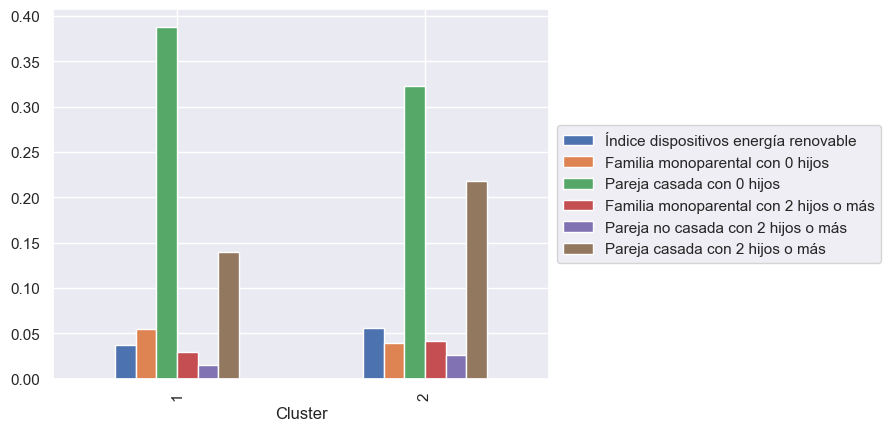

In [355]:
# resultados por cluster
results = h3_df[['Índice dispositivos energía renovable', 'Familia monoparental con 0 hijos',
                 'Pareja casada con 0 hijos', 
                 'Familia monoparental con 2 hijos o más', 'Pareja no casada con 2 hijos o más', 
                 'Pareja casada con 2 hijos o más', 'Cluster']].groupby('Cluster').mean()

# Grafica los resultados por boxplot
results.plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


- Tras ver los clusters con barplots, se visualiza que el cluster 2 tiene un índice medio 
mayor de dispositivos de energía renovable que el cluster 1. Asímismo, el cluster 2 agrupa provincias que en su media obtienen un mayor porcentaje en familias compuestas por más miembros. 
- Además, esto se puede comprobar calculando las medias para columna de cada cluster.

In [356]:
# describe de cada cluster
h3_df[h3_df['Cluster'] == 1].describe().loc['mean'] * 100

Índice dispositivos energía renovable       3.755236
Familia monoparental con 0 hijos            5.431021
Familia monoparental con 1 hijo            10.801898
Familia monoparental con 2 hijos o más      2.940791
Pareja casada con 0 hijos                  38.811169
Pareja casada con 1 hijo                   18.346626
Pareja casada con 2 hijos o más            13.945597
Pareja no casada con 0 hijos                5.402618
Pareja no casada con 1 hijo                 2.780671
Pareja no casada con 2 hijos o más          1.539609
Cluster                                   100.000000
Name: mean, dtype: float64

In [357]:
# describe de cada cluster
h3_df[h3_df['Cluster'] == 2].describe().loc['mean'] * 100

Índice dispositivos energía renovable       5.583400
Familia monoparental con 0 hijos            3.894851
Familia monoparental con 1 hijo             8.643178
Familia monoparental con 2 hijos o más      4.157680
Pareja casada con 0 hijos                  32.325326
Pareja casada con 1 hijo                   17.303522
Pareja casada con 2 hijos o más            21.849877
Pareja no casada con 0 hijos                5.837581
Pareja no casada con 1 hijo                 3.332385
Pareja no casada con 2 hijos o más          2.655600
Cluster                                   200.000000
Name: mean, dtype: float64

- No obstante, aunque en el cluster 2 agrupa provincias con mayor índice de dispositivos de energía renovable y un mayor porcentaje de familia más grandes, el otro cluster agrupa demasiadas provincias. Haber forzado la creación de sólo 2 clusters, fuerza a provincias estar en un cluster donde no tienen porqué encajar bien. Por lo tanto, de forma individual, muchas provincias son difícil de interpretar por qué se agrupan en un cluster.
    - Por ejemplo, Ciudad Real, que en cuanto índice de dispositivos de energía renovable encajaría mejor en el cluster 1, al igual que para diferentes tipos de nucleo familiares (así como tipos compuestos por pareja no casada).

In [358]:
# Mostrar fila de Sevilla
ciudadReal = h3_df.loc['Ciudad Real'] * 100
ciudadReal

Índice dispositivos energía renovable       4.233721
Familia monoparental con 0 hijos            2.747323
Familia monoparental con 1 hijo             5.813623
Familia monoparental con 2 hijos o más      3.919982
Pareja casada con 0 hijos                  35.130110
Pareja casada con 1 hijo                   18.069245
Pareja casada con 2 hijos o más            26.469106
Pareja no casada con 0 hijos                4.366338
Pareja no casada con 1 hijo                 1.824098
Pareja no casada con 2 hijos o más          1.660174
Cluster                                   200.000000
Name: Ciudad Real, dtype: float64

#### **Conclusión obtenida por Clustering Jerárquico**

- Como el clustering jerárquico es sensible respecto a las primeras agrupaciones, y el silueta que se obtiene en la agrupación escogido es débil, los clusters resultantes no son lo suficientemente concluyentes para determinar si en una provincia con familias compuestas por más miembros, hay más dispositivos de energía renovable. 

-  Por lo tanto, **el clustering jerárquico no nos permite validar ni rechazar la hipótesis de forma segura**.

### **DBSCAN**

- Como el clustering jerárquico ha resultado en clusters irregulares, se va a tratar de aplicar DBSCAN, pues con este modelo los clusters son regiones densas en el espacio de puntos, separadas por regiones de menor densidad.

#### **Parametrización**

- Se escoge 3 como el número mínimo de puntos requeridos para que una región se considere densa.

- Dibujamos en un gráfico la distancia más corta al vecino para obtener el pesilon a utilizar para DBSCAN. Para calcular el epsilon adecuado nos apoyamos en la matriz de similitud calculada en el clustering jerárquico.

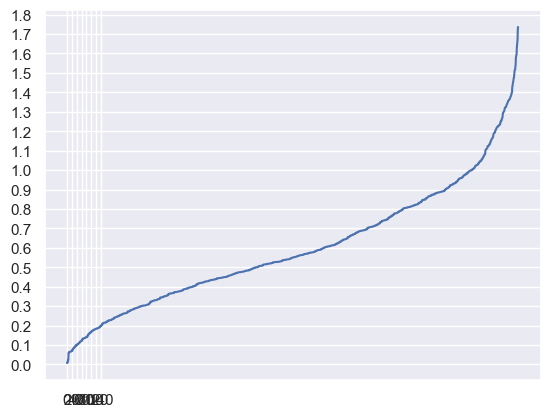

In [359]:
minPts=40
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_scaled, minPts, include_self=False)
Ar = A.toarray()

seq = []
for i,s in enumerate(features_scaled):
    for j in range(len(features_scaled)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
            
seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(numpy.arange(0, 150, 20))
ax.set_yticks(numpy.arange(0, 3, 0.1))

plt.plot(seq)
plt.show()

- Se prueba a realizar diferentes clusters desde 0.6 a 1.1 (con intervalos de 0.1). Así, el DBSCAN aisla una zona densa de aquellos elementos que se consideran outliers.

In [360]:
from sklearn.cluster import DBSCAN

for eps in numpy.arange(0.6, 1.1, 0.1):
  db = DBSCAN(eps, min_samples=minPts).fit(X_pca)
  core_samples_mask = numpy.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))

  0.60, 0, 47
  0.70, 1, 7
  0.80, 1, 4
  0.90, 1, 1
  1.00, 1, 0
  1.10, 1, 0


- Escogemos epsilon = 0.9, para ver qué outlier se obtiene.

In [361]:
db = DBSCAN(eps=0.9, min_samples=minPts).fit(X_pca)
labels = db.labels_
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

- Visualizamos los resultados.

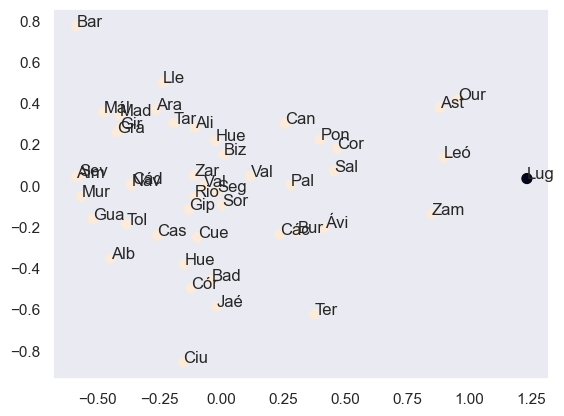

In [362]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], h3_df.index[i][0:3]) 
plt.grid()
plt.show()

- Se indica qué provincias son del cluster de mayor densidad y el outlier.

In [ ]:
# asignar los clusters a las provincias
h3_df['dbscan_group'] = labels

- Se saca Lugo que es el outlier. Mostramos qué características tienen para tratar de explicar este outlier.

In [364]:
lugo = h3_df[h3_df['dbscan_group'] == -1]
lugo * 100

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster,dbscan_group
Provincias,,,,,,,,,,,,
Lugo,2.820683,6.037995,10.997795,2.674316,38.500545,19.995662,13.248166,4.669596,2.503395,1.37253,100,-100


- Se ven las estadísticas del cluster obtenido en el DBSCAN.

In [372]:
# drop outlier 
h3_df_dbscan = h3_df.drop('Lugo')
# describe
h3_df_dbscan.describe() * 100

,Índice dispositivos energía renovable,Familia monoparental con 0 hijos,Familia monoparental con 1 hijo,Familia monoparental con 2 hijos o más,Pareja casada con 0 hijos,Pareja casada con 1 hijo,Pareja casada con 2 hijos o más,Pareja no casada con 0 hijos,Pareja no casada con 1 hijo,Pareja no casada con 2 hijos o más,Cluster,dbscan_group
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,5.444745,4.015236,8.826634,4.057656,32.896065,17.358378,21.177710,5.815693,3.290438,2.562190,191.304348,0.0
std,1.924136,0.701721,1.264538,0.723531,3.290523,0.996670,3.523099,1.267061,0.789947,0.708586,28.488492,0.0
min,2.864656,2.747323,5.813623,2.617160,27.321225,15.160749,12.525446,3.236634,1.486636,1.335040,100.000000,0.0
25%,4.237374,3.553473,7.957012,3.555084,29.876980,16.533366,19.334221,4.897892,2.823898,2.103949,200.000000,0.0
50%,4.754798,3.995639,8.857326,4.129780,32.718144,17.355477,21.514082,5.805561,3.298523,2.571445,200.000000,0.0
75%,6.217225,4.402766,9.462492,4.497273,35.350566,18.203291,23.810689,6.570771,3.733811,2.970752,200.000000,0.0
max,12.301337,5.693179,11.521576,5.622840,41.312078,18.974221,27.251044,8.916001,5.201401,4.663033,200.000000,0.0


#### **Conclusión obtenida por DBSCAN**

- **Lugo es la provincia que tiene menor índice de dispositivos de energía renovable.**

    - Tiene uno de los porcentaje más bajos de familias compuestas por pareja casada con 2 hijos o más. Al igual que para familias compuestas por pareja no casada con 2 hijos o más y para familias monoparentales con 2 hijos o más.

    - Por otro lado,**Lugo es la provincia con mayor porcentaje de familia monoparental con 0 hijos** (6.04%). Además, de ser de las que tiene un mayor porcentaje de familias monoparentales con 1 hijo, familias casadas con 0 hijos. **También, es la provincia con mayor porcentaje de familia compuesta por pareja casada con un hijo (20%)**

- De esta manera, **se puede concluir que Lugo al ser una provincia con mayores porcentajes en familias compuestas por menos miembros, tiene un menor porcentaje de dispositivos de energía renovable**. ✅

- No obstante, **al tratarse de un dato anómalo, no se puede sacar conclusiones a nivel  nacional para validar la hipótesis**. Por lo que, mediante el modelo de K-Means, se tratará de validar la hipótesis finalmente.